# PyVG: Data Science to predict Video Games sales
>Equipe: Alexis Terrasse, Henri-François Mole, Hsan Drissi, Stephane Lelievre
>
>Promo: DS_Oct21
---
## Regression



In [2]:
# Import des bibliothèques nécessaires
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import model_selection, preprocessing
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, LogisticRegression,ElasticNetCV
from sklearn.metrics import mean_squared_error,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import xgboost as xgb
%matplotlib inline 
from sklearn.feature_selection import SelectKBest,SelectFromModel,f_regression
import scipy.stats as stats
import seaborn as sns

#Lecture du fichier 

df=pd.read_csv(r'C:\Users\Windows\Documents\GitHub\PyVG-Data-Science-to-predict-Video-Games-sales\data\vgsales_eda2_ready.csv')


In [3]:
#nettoyage des données doublons et des Nan
df=df.drop_duplicates()
df=df.dropna()

In [4]:
#on met le nom des jeux en index
df=df.set_index('Name')

In [5]:
#on get_dummies la variables label

df=df.join(pd.get_dummies(df.labels,drop_first=True,prefix='labels'))


#Selection des variables logarithmiques

df_log=df.select_dtypes(exclude='object').drop(['Global_Sales','year','labels'],1)

df_log.head()

,Score_pro,Score_user,N_pro,N_user,compound,Global_Sales.log,N_pro.log,N_user.log,PC,nintendo,...,genre_Sports,genre_Strategy,genre_Visual+Novel,labels_1,labels_2,labels_3,labels_4,labels_5,labels_6,labels_7
Name,,,,,,,,,,,,,,,,,,,,,
.hack//G.U. Last Recode,7.6,8.2,21,17,0.458421,10.085851,3.091042,2.890372,0,0,...,0,0,0,0,0,0,1,0,0,0
007 Legends,4.1,4.1,22,55,-0.133464,10.434145,3.135494,4.025352,0,0,...,0,0,0,0,0,0,0,0,0,1
007 Legends,4.1,4.1,22,55,-0.133464,10.434145,3.135494,4.025352,0,0,...,0,0,0,0,0,0,0,0,0,1
007 Legends,4.5,4.5,49,78,-0.093835,10.275086,3.912023,4.369448,0,0,...,0,0,0,0,0,0,0,0,0,1
007 Legends,4.5,4.5,49,78,-0.093835,10.275086,3.912023,4.369448,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
#Séparation des données entre variables explicatives et variable cible 

target=df_log['Global_Sales.log']
data=df_log.drop('Global_Sales.log',1)




In [7]:
#normalisation des données

scaler=StandardScaler()

data=pd.DataFrame(scaler.fit_transform(data),columns=data.columns,index=data.index)

In [8]:
#séparation des données en un ensemble d'apprentissage et un ensemble de test contenant 20% des données

X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.2)


1. REGRESSION LINEAIRE MULTIVARIEE

In [9]:
#instanciation du modèle
lr=LinearRegression()

#entrainement du modèle

lr.fit(X_train,y_train)

#prediction sur X_train,X_test
y_pred_train=lr.predict(X_train)
y_pred_test= lr.predict(X_test)

In [10]:
#On va s'interesser au score r2 et au résidus du modèle

#Score r2
score_lr_train=lr.score(X_train, y_train)
score_lr_test=lr.score(X_test, y_test)

#mean_squared_error
lr_mse_train=mean_squared_error(y_pred_train,y_train)
lr_mse_test=mean_squared_error(y_pred_test,y_test)

print('Coefficient de détermination du modèle sur l échantillon d apprentissage :', score_lr_train)
print('score du modèle sur l ensemble de test : ', score_lr_test)
print('mse train : ' , mean_squared_error(y_pred_train,y_train))
print('mse test : ', mean_squared_error (y_pred_test,y_test))

Coefficient de détermination du modèle sur l échantillon d apprentissage : 0.52183252563588
score du modèle sur l ensemble de test :  0.5275440236983596
mse train :  2.899119952161808
mse test :  2.755590625159001


Analyse Graphique

In [11]:
def inverse_log (x):
    x=np.exp(x)/10000-1
    return x

In [12]:
#prediction
pred_test=lr.predict(X_test)
pred_train=lr.predict(X_train)

#residus
residus=y_train-pred_train

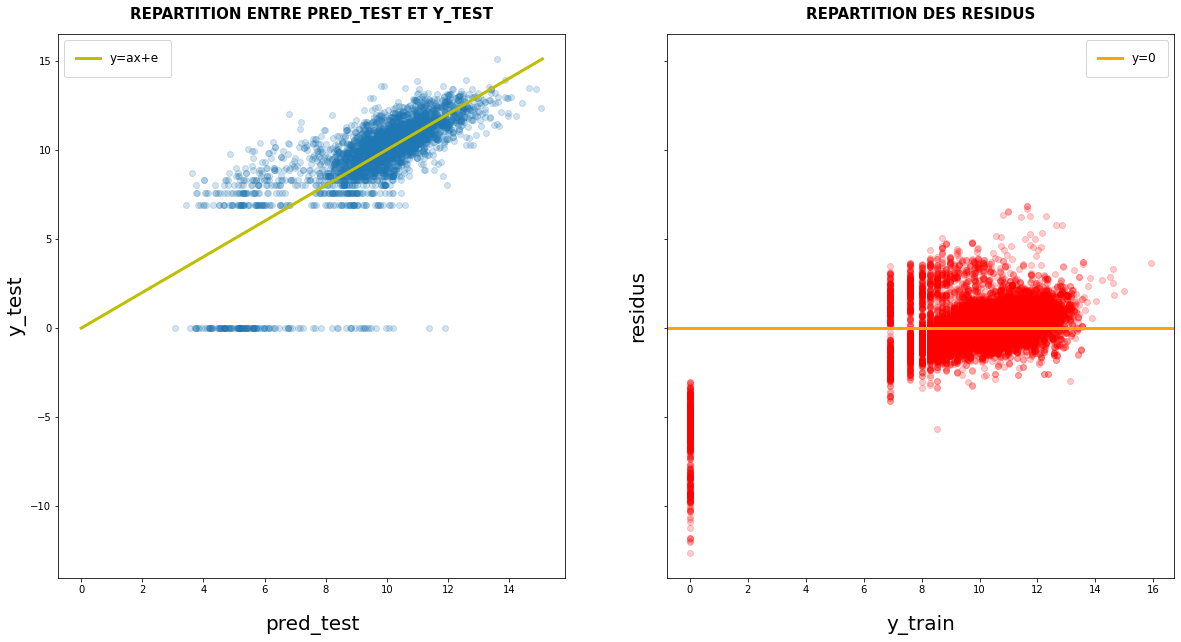

In [13]:

#Graphique
fig,[ax1,ax2]=plt.subplots(nrows=1,ncols=2,figsize=(20,10),sharey=True)
ax1.scatter(pred_test,y_test,alpha=0.2)
ax1.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()),color='y',label='y=ax+e',linewidth=3)
ax1.set_xlabel('pred_test',fontsize=20,labelpad=20)
ax1.set_ylabel('y_test',fontsize=20)
ax1.set_title('REPARTITION ENTRE PRED_TEST ET Y_TEST',
              fontsize=15,
              pad=15,
              fontweight='demibold')
ax1.legend(fontsize=12,
           borderpad=1)

ax2.scatter(y_train,residus,marker='o',color='red',alpha=0.2)
ax2.axhline(y=0,color='orange',label='y=0',linewidth=3)
#ax2.plot(0,np.max(y_train),(0,0),lw=5,color='g')
ax2.set_xlabel('y_train',fontsize=20,labelpad=20)
ax2.set_ylabel('residus',fontsize=20,labelpad=20,)
ax2.set_title('REPARTITION DES RESIDUS',
              loc='center',
              fontsize=15,
              pad=15,
              fontweight='demibold')
ax2.legend(fontsize=12,
           borderpad=1)

Diagramme Quantile-Quantile

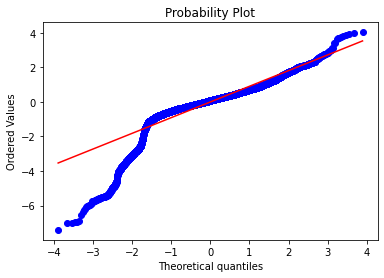

In [14]:
residus_norm = (residus-residus.mean())/residus.std()

stats.probplot(residus_norm, plot=plt)

plt.show();

#On constate que les residus s'aligne sur une grande partie de la courbe, on peut donc partir sur l'hypothèse
#normalité même si les valeurs sont très différentes sur le début.
#On va essayer de diminuer le nombre de variables utilisés (77 pour ce modèle) 

Amélioration du modèle avec Select_Kbest et f_regression

In [15]:
from sklearn.feature_selection import SelectKBest,SelectFromModel
from sklearn.feature_selection import f_regression

In [16]:
#création d'une pipeline avec la grille de paramètres

scaler=StandardScaler() # Transformateur : Normalisation
scalerKB=SelectKBest() # Transformateur : Selection de variables
sklr=LinearRegression() # modèle : LinearRegression


pipelineKB=Pipeline([#('scaling',scaler),
                     ('selection',scalerKB),
                     ('model',sklr)])

param_grid={'selection__k' : np.arange(1,77)}

In [17]:
import warnings
warnings.filterwarnings('ignore')
scoring = {'score': 'r2'}
grid=GridSearchCV(estimator=pipelineKB, param_grid=param_grid,cv=10,scoring=scoring,refit='score') #Instanciation d'un objet GridSearchCV

grid.fit(X_train,y_train)

print('meilleurs parapmètres :',grid.best_params_) #Affichage des meilleurs paramètres pour la pipeline pipelineKB.
print('meilleur score :',grid.best_score_)# Affichage du score obtenu par validation croisée avec les meilleurs paramètres
results = grid.cv_results_

meilleurs parapmètres : {'selection__k': 76}
meilleur score : 0.5154826428261995


In [18]:
y_pred_test=grid.predict(X_test)
y_pred_train=grid.predict(X_train)
score_train_KB=grid.score(X_train,y_train)
score_test_KB=grid.score(X_test,y_test)
Kbest_mse_train=mean_squared_error(y_pred_train,y_train)
Kbest_mse_test=mean_squared_error(y_pred_test,y_test)


print(score_train_KB)
print(score_test_KB)
print(mean_squared_error(y_pred_train,y_train))
print(mean_squared_error(y_pred_test,y_test))

0.52183252563588
0.5275440236983596
2.899119952161808
2.755590625159001


Amélioration avec la Fonction SelectFromModel

In [19]:
from sklearn.feature_selection import SelectFromModel
lrSFM=LinearRegression()
scalerSFM=SelectFromModel(lrSFM)


In [20]:
lr = LinearRegression()
sfm = SelectFromModel(lrSFM)
sfm_train = sfm.fit_transform(X_train, y_train)
sfm_test = sfm.transform(X_test)

In [21]:
#colonne sélectionnée

data.columns[sfm.get_support()]


Index(['year.release_2001', 'year.release_2002', 'year.release_2003',
       'year.release_2004', 'year.release_2005', 'year.release_2006',
       'year.release_2007', 'year.release_2008', 'year.release_2009',
       'year.release_2010', 'year.release_2011', 'year.release_2012',
       'year.release_2013', 'year.release_2014', 'year.release_2015',
       'year.release_2016', 'year.release_2017', 'year.release_2018'],
      dtype='object')

In [22]:

sfmlr = LinearRegression()
sfmlr.fit(sfm_train, y_train)

print(sfmlr.score(sfm_train, y_train))
print(sfmlr.score(sfm_test, y_test))

0.02306215857395888
0.027598030306438703


2. Régression Linéaire Régularisée Elastic Net

In [23]:
model_el=ElasticNetCV(l1_ratio=(np.linspace(0,1,100)),alphas=(np.linspace(0,1,100)),cv=8)
model_el.fit(X_train,y_train)

ElasticNetCV(alphas=array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3...
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747475,
       0.75757576, 0.76767677, 0.77777778, 0.78787879, 0.7979798 ,
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ]))

In [24]:

score_train_elasticNet=model_el.score(X_train,y_train)
score_test_elasticNet=model_el.score(X_test,y_test)
print(model_el.score(X_train,y_train))
print(model_el.score(X_test,y_test))

0.5218354918841643
0.5275071291439687


Tableau recapitulatif

In [25]:

Kbest_mse_train=mean_squared_error(y_pred_train,y_train)
Kbest_mse_test=mean_squared_error(y_pred_test,y_test)
elastic_mse_train=mean_squared_error(y_pred_train,y_train)
elastic_mse_test=mean_squared_error(y_pred_test,y_test)
lr_mse_train=mean_squared_error(y_pred_train,y_train)
lr_mse_test=mean_squared_error(y_pred_test,y_test)

print(score_train_KB)
print(score_test_KB)

dict={'Reg_simple':[score_lr_train,score_lr_test,lr_mse_train,lr_mse_test,],
      'K_Best':[score_train_KB,score_test_KB,Kbest_mse_train,Kbest_mse_test],
      'elasticNet':[score_train_elasticNet,score_test_elasticNet,elastic_mse_train,elastic_mse_test]}

#dm=pd.DataFrame(data=dict,index=['score (X_train,y_train)','score (X_test,y_test)','mse(y_pred_train,y_train)','mse(y_pred_test,y_test)']).style.background_gradient(cmap='Blues')
dm=pd.DataFrame(data=dict,index=['score (X_train,y_train)','score (X_test,y_test)','mse(y_pred_train,y_train)','mse(y_pred_test,y_test)'])


dm

0.52183252563588
0.5275440236983596


,Reg_simple,K_Best,elasticNet
"score (X_train,y_train)",0.521833,0.521833,0.521835
"score (X_test,y_test)",0.527544,0.527544,0.527507
"mse(y_pred_train,y_train)",2.899120,2.899120,2.899120
"mse(y_pred_test,y_test)",2.755591,2.755591,2.755591


Text(0.5, 1.0, 'Tableau comparatifs des résultats')

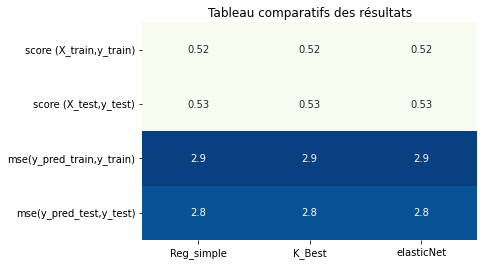

In [26]:
# Tableau récapitulatif

sns.heatmap( dm, annot=True, cmap= 'GnBu', cbar=False)
plt.title('Tableau comparatifs des résultats')

In [27]:

#on renomme les variables du modèle lr
pred_test_lr=pred_test
pred_train_lr=pred_train
residus_norm_lr=residus


XGBOOST

In [29]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [30]:

#pred = model.predict(X_test) 
#rmse = mean_squared_error(y_test,pred)

params={'learning_rate':[0.001,0.01,0.1],
        'gamma':[0.5, 1, 1.5],
        'subsample':[0.6,0.8],
        'max_depth':[4,5,6]
        }


In [31]:
#céations de plis

folds=5
rkf=RepeatedKFold(n_splits=folds,n_repeats=2,random_state=123)

In [32]:
#instanciation du modèle XGB regressor

model = XGBRegressor(n_estimators=1500,objective='reg:squarederror',n_jobs=-1)

In [33]:
grid=GridSearchCV(estimator=model,param_grid=params,scoring=('r2','neg_mean_squared_error'),refit='r2',verbose=3,cv=rkf)

In [34]:
X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.2)

In [ ]:
grid.fit(X_train,y_train)

In [36]:



print(grid.score(X_train,y_train))
print(grid.score(X_test,y_test))
#print(grid.cv_results_)
#rid.best_estimator_


0.990234025883374
0.8503490212016085


In [37]:
pred_test=grid.predict(X_test)
pred_train=grid.predict(X_train)

print(mean_squared_error(y_train,pred_train))
print(mean_squared_error(y_test,pred_test))

0.05957469959719434
0.8499454656637717


In [38]:
dict={'Reg_simple':[score_lr_train,score_lr_test,lr_mse_train,lr_mse_test,],
      'K_Best':[score_train_KB,score_test_KB,Kbest_mse_train,Kbest_mse_test],
      'elasticNet':[score_train_elasticNet,score_test_elasticNet,elastic_mse_train,elastic_mse_test]}

#dm=pd.DataFrame(data=dict,index=['score (X_train,y_train)','score (X_test,y_test)','mse(y_pred_train,y_train)','mse(y_pred_test,y_test)']).style.background_gradient(cmap='Blues')
dm=pd.DataFrame(data=dict,index=['score (X_train,y_train)','score (X_test,y_test)','mse(y_pred_train,y_train)','mse(y_pred_test,y_test)'])

In [888]:
#residus=y_train-pred_train

#pred_test_lr=pred_test
#pred_train_lr=pred_train
#residus_norm_lr=residus

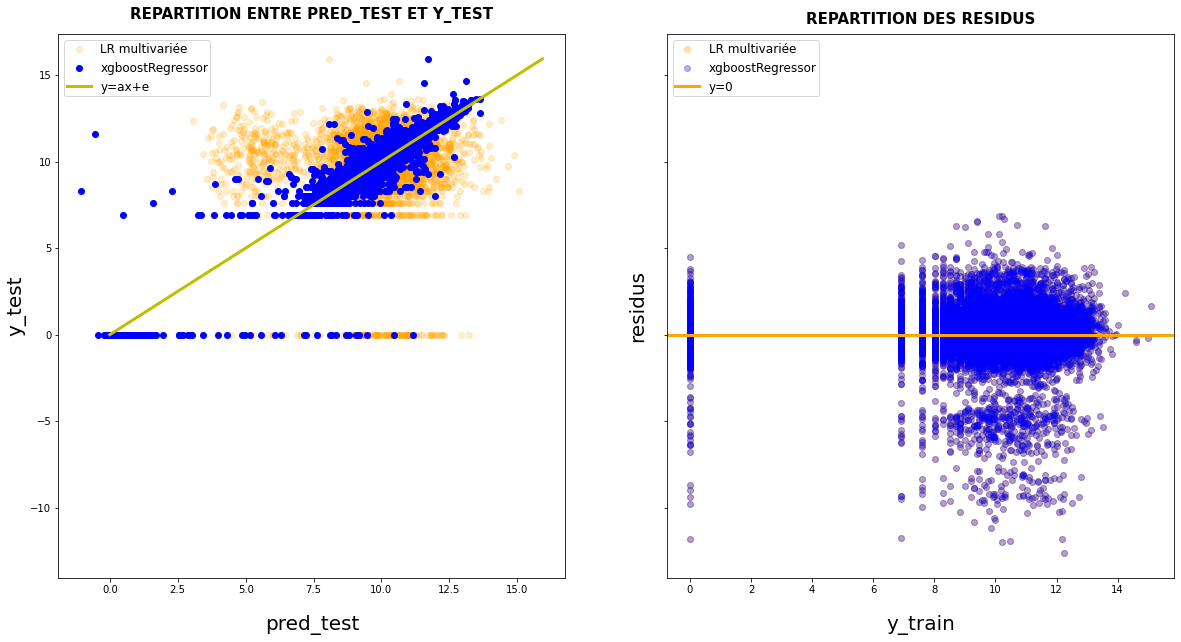

In [39]:
#Graphique
fig,[ax1,ax2]=plt.subplots(nrows=1,ncols=2,figsize=(20,10),sharey=True)
ax1.scatter(pred_test_lr,y_test,alpha=0.2,color='orange',label='LR multivariée')
ax1.scatter(pred_test,y_test,alpha=1,color='blue',label='xgboostRegressor')
ax1.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()),color='y',label='y=ax+e',linewidth=3)
ax1.set_xlabel('pred_test',fontsize=20,labelpad=20)
ax1.set_ylabel('y_test',fontsize=20)
ax1.set_title('REPARTITION ENTRE PRED_TEST ET Y_TEST',
              fontsize=15,
              pad=15,
              fontweight='demibold')
ax1.legend(fontsize=12,
           borderpad=0.2)

ax2.scatter(y_train,residus_norm_lr,marker='o',alpha=0.3,color='orange',label='LR multivariée')
ax2.scatter(y_train,residus,marker='o',alpha=0.3,color='blue',label='xgboostRegressor')

ax2.axhline(y=0,color='orange',label='y=0',linewidth=3)
#ax2.plot(0,np.max(y_train),(0,0),lw=5,color='g')
ax2.set_xlabel('y_train',fontsize=20,labelpad=20)
ax2.set_ylabel('residus',fontsize=20,labelpad=20,)
ax2.set_title('REPARTITION DES RESIDUS',
              loc='center',
              fontsize=15,
              pad=10,
              fontweight='demibold')
ax2.legend(fontsize=12,
           borderpad=0.2,
           loc='upper left')

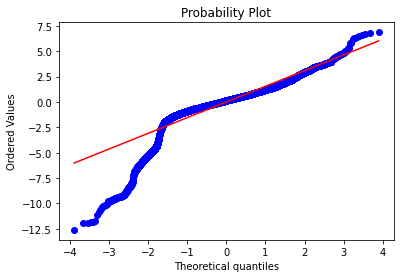

In [40]:
residus_norm = (residus-residus.mean())/residus.std()

stats.probplot(residus, plot=plt)

plt.show();

#On constate que les residus s'aligne sur une grande partie de la courbe, on peut donc partir sur l'hypothèse
#normalité même si les valeurs sont très différentes sur le début.
#On va essayer de diminuer le nombre de variables utilisés (77 pour ce modèle) 

In [41]:
#Fonction inverse de log
def inverse_log (x):
    x=np.exp(x)
    return x

In [43]:
y_test_num=round(inverse_log(y_test)/100000,2)

tab_comparatif=pd.DataFrame(y_test_num).reset_index().join(pd.DataFrame(data=np.round(inverse_log(pred_test)/100000,2),columns=['Predictions']))
tab_comparatif['erreur']=tab_comparatif['Global_Sales.log']-tab_comparatif['Predictions']
#tab_comparatif=tab_comparatif.rename()

In [44]:
#affichage du tableau comparatif et erreur moyenne

display(tab_comparatif.describe())
tab_comparatif=tab_comparatif.rename(columns={'Global_Sales.log':'Global_Sales'})


,Global_Sales.log,Predictions,erreur
count,3505.000000,3505.000000,3505.000000
mean,0.626591,0.524882,0.101709
std,1.728495,0.758313,1.493354
min,0.000000,0.000000,-4.650000
25%,0.090000,0.100000,-0.030000
50%,0.280000,0.270000,0.000000
75%,0.690000,0.630000,0.080000
max,82.650000,8.420000,81.430000


Text(0.5, 1.0, 'Tableau comparatifs ventes predites/vente réels')

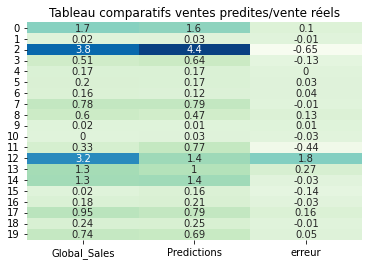

In [48]:
#tableau comparatif avec heatmap
sns.heatmap(tab_comparatif.iloc[0:20,1:],cmap='GnBu',annot=True,cbar=False)

plt.title('Tableau comparatifs ventes predites/vente réels')

Text(0.5, 1.0, 'Tableau comparatifs des résultats')

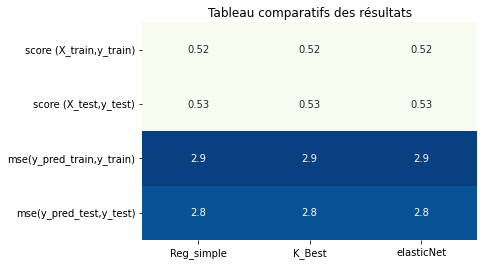

In [46]:
sns.heatmap( dm, annot=True, cmap= 'GnBu', cbar=False)
plt.title('Tableau comparatifs des résultats')